<p>Department Of Computer Science

COMP432, COMPUTER SECURITY

Dr. Mohammad Alkhanafse

Section 2

</p>

<div align="center">

<img src="https://github.com/sondosaabed/Introducing-Generative-AI-with-AWS/assets/65151701/01485d19-c6d6-4072-99d7-178ea8ec4364" alt="Birzeit University Logo" height="170px">


# Iris eye Recognition

</div>
<div align="center">
An (End-to-end Identification) Biometric Authentication system using Iris

</div>

<b>Prepared by:</b> Sondos Aabed

<b>Studnet ID:</b> 1190652

<hr>

## Abstract

In this project, a Biometric Authentication system using the Iris biometric authentication method is design.

<hr>

## Table of Contents
- Introduction
    - About Dataset Used
    - Aim and Objectives
    - Methodology
- Theory
- Software Listing
- Implementation
    - Dataset Analysis
    - Data Modeling
    - GUI
- Conclusion
- Refrences

## List of Figures
- Figure: IRis dataset collection device IKEMB-100 camera 
- Figure: Figure: Data Sample from IRIS CaSIA
- Figure: Ramndom Small sample of the dataset
- Figure: Distribution of Image Sizes
- Figure: Distribution of Aspect Ratios
- Figure: Labels Frequency Treemap
- Figure: Preprocessed image sample

## List of Tables
- Table 1: Software Listenings
- Table 3: Dataset Head
- Table 4: Dataset Tail
- Table 5: Dataset Numerical Describtion
- Table 6: Missing Values By Percentage
- Table 7: Dataset Columns Data types
- Table 8: Number of uniques in the datasets
- Table 9: Labels Distribution

<hr>

## Introduction

The Iris-Recongtion has been widely used in identication, for many resons : [1]
1. `Unique:` there are not any iris having the same physical characteristic as others, even if they come from the same person or identical twins; 
2. `Stability:` the iris is formed during childhood, and it generally maintains unchangeable physical characteristics throughout life; 
3. `Informative:` the iris has rich texture information such as spots, stripes, laments and coronas.
4. `Safety:` Since the iris is located in a circular area under the surface of the eye between the black pupil and the white sclera, it is rarely disturbed by external factors. As a result, it is dicult to forge the iris pattern; 
5. `Contactless:` Iris Recognition (IR) is more hygienic than biometrics that requires contact, such as fngerprint recognition.
 

### About Dataset used

CASIA-Iris-Thousand contains 20,000 iris images from 1,000 subjects, which were collected using IKEMB-100 camera (Figure ) produced by IrisKing. IKEMB-100 is a dual-eye iris camera with friendly visual feedback, realizing the effect of “What You See Is What You Get”. The bounding boxes shown in the frontal LCD help users adjust their pose for high-quality iris image acquisition. The main sources of intra-class variations in CASIA-Iris-Thousand are eyeglasses and specular reflections. Since CASIA-Iris-Thousand is the first publicly available iris dataset with one thousand subjects, it is well-suited for studying the uniqueness of iris features and develop novel iris classification and indexing methods.

<div align="center">
    <p>Figure: IRis dataset collection device IKEMB-100 camera [3]</p>
    <img src="https://hycasia.github.io/dataset/casia-irisv4/V4Fig.8.jpg" alt="Iris collection device"/>
    <p>Figure: Data Sample from IRIS CaSIA [3]</p>
    <img src="https://hycasia.github.io/dataset/casia-irisv4/V4Fig.9.jpg" alt="Data sample"/>
</div>

<hr>

### Aim and Objectives

- To design a biometric based authentication system.
- To perform data analysis on Iris Dataset
- To perfrom data modeling as a user recognition task (Verifier Module) 
- To build an enrollment module (Enrollment Module)

<hr>

### Problem Statemnet

- This is a Multi-class classification problem where we have mutli persons each have left eye or right eyes Iris. Mainly teh dataset contains 1000 persons with Iris images of the Left and the Right eye. In total there is 2000 unique labels, with sampling there will be 1400 unique labels.

### Methodogly 

The approach in this implenetauion, is an  End-to-end segmentaion free approach using deep learning for identifiation of Iris. Where a base model is used as the Feature extractor and the Dense softmax are used for the classification task.

<hr>

## Theory

<hr>

## Software Listing

In this project many tools were used and utilized. The followning table shows the software tools and versions used in this project.

Table 1: Software Listenings

| Tools   | Version   |
|-------|-----------|
|Python|3.12.2|
| pandas | 2.2.2 |
| numpy    | 1.26.4 |
| Pillow (PIL) | 9.5.0 |
| TensorFlow | 2.15.0 |
| OpenCV (cv2) | 4.9.0 |
| Keras (TensorFlow) | updated |
| matplotlib   | updated |
| scikit-learn | updated |
| squarify | updated |
|Visual Studio Code| Updated|
|Git & github| https://github.com/sondosaabed/Iris-of-eyes-recognition|

<hr>

## Implemetation

In this section, the aim and objectives are met and presented. First the dataset is looked into and decisions are made based on that, then the model archeiticure is prepared and finally the enrollment module is used and the model is integrated into it.

<hr>

Necceary imports

In [1]:
import squarify 
import os
import PIL
import math
import cv2
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from keras import Model,  Sequential
from sklearn.model_selection import cross_val_score
from keras import backend as K
from tensorflow import keras as keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
import ipywidgets as widgets
from keras.layers import InputLayer,Activation,Dense,Dropout, Conv2D, BatchNormalization, Flatten, MaxPooling2D, Input, Reshape, Concatenate, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Softmax, LeakyReLU

2024-05-03 21:52:11.372904: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 21:52:11.373008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 21:52:11.549329: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Dataset Analysis

#### Loading Dataset

In [2]:
def load_dataset(path):
    """
    Loading the dataset into a pandas datframe.
    The images of CASIA-Iris-Thousand are stored as:    /CASIA-Iris-Thousand/YYY/E/S5YYYENN.jpg

        YYY: the unique identifier of the subject in the subset
        E: ‘L’ denotes left eye and ‘R’ denotes right eye
        NN: the index of the image in the class
    
    Args:
        path(str): string that has the path of the dataset
    Returns:
        df(pd.DataFrame): the loaded dataframe
    """
    labels = []
    images = []

    for folder in os.listdir(path):
        for lr in os.listdir(path+'/'+folder): #left or right
            for image in os.listdir(path+'/'+folder+'/'+lr):
                if image.endswith('b') is False:
                    images.append(path+'/'+folder+'/'+lr+'/'+image)
                    labels.append(folder+'-'+lr) #+'-'+lr

    df = pd.DataFrame(list(zip(labels, images)), columns=['Label', 'ImagePath'])
    return df, labels, images

In [3]:
df, labels, images = load_dataset('/kaggle/input/casia-iris-thousand/CASIA-Iris-Thousand')

In [4]:
df.shape

(20000, 2)

In [5]:
# df = df.sample(11398, random_state=1190652)
# df_subset = df.iloc[:11398].copy()

#### Expolring Dataset

In [6]:
def missing_values(df):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': (missing_count.values / len(df)) * 100  
    })
    return  missing_percetanges

In [7]:
def explore_data(df):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    head = pd.DataFrame(df.head())
    tail = pd.DataFrame(df.tail())
    nunique = pd.DataFrame(df.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(df.describe())
    dtypes =  pd.DataFrame(df.dtypes, columns=["Datatype"])
    labels_distribution = pd.DataFrame(df['Label'].value_counts())
    results = {
        'Table 3: Dataset Head:':head,
        'Table 4: Dataset Tail:':tail,
        'Table 5: Dataset Numerical Describtion: ':describe,
        'Table 6: Missing Values By Percentage': missing_values(df), 
        'Table 7: Dataset Columns Data types: ':dtypes,
        'Table 8: Number of uniques in the datasets:':nunique,
        'Table 9: Labels Distribution:':labels_distribution}
    return results

In [8]:
def print_sample_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Table 6: Missing Values By Percentage':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [9]:
print_sample_exploration(explore_data(df))

Table 3: Dataset Head:


,Label,ImagePath
0,437-R,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
1,437-R,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
2,437-R,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
3,437-R,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
4,437-R,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...


Table 4: Dataset Tail:


,Label,ImagePath
19995,715-L,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
19996,715-L,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
19997,715-L,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
19998,715-L,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
19999,715-L,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...


Table 5: Dataset Numerical Describtion: 


,Label,ImagePath
count,20000,20000
unique,2000,20000
top,715-L,/kaggle/input/casia-iris-thousand/CASIA-Iris-T...
freq,10,1


Table 6: Missing Values By Percentage
Total Sum of Missing Percetange:  0.0


,Column,Counts,Percentage
0,Label,0,0.0
1,ImagePath,0,0.0


Table 7: Dataset Columns Data types: 


,Datatype
Label,object
ImagePath,object


Table 8: Number of uniques in the datasets:


,#_of_Unique
Label,2000
ImagePath,20000


Table 9: Labels Distribution:


,count
Label,
715-L,10
437-R,10
437-L,10
515-R,10
515-L,10
...,...
768-L,10
642-R,10
642-L,10


- Images Visualizations

In [10]:
def show_random_samples(df, num):
    """
    Shows a sample on the dataframe in a specific location.
    Args:
        df (pd.DataFrame): the dataset
        num (int): the number of random samples to display
    Return:
        Nothing but shows a sample in the display
    """
    random.seed(1190652)
    random_indices = random.sample(range(df.shape[0]), num)
    num_rows = math.ceil(num / 4) 

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))  
    for i, idx in enumerate(random_indices):
        row = i // 4
        col = i % 4
        
        if idx < df.shape[0]:  
            image_path =  df.loc[idx, "ImagePath"]
            image = PIL.Image.open(image_path)
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"Image {idx} Person Label: {df.loc[idx, 'Label']}")
            ax.axis("off")

    plt.suptitle("Random Small Sample of the Dataset")
    plt.tight_layout()
    plt.show()

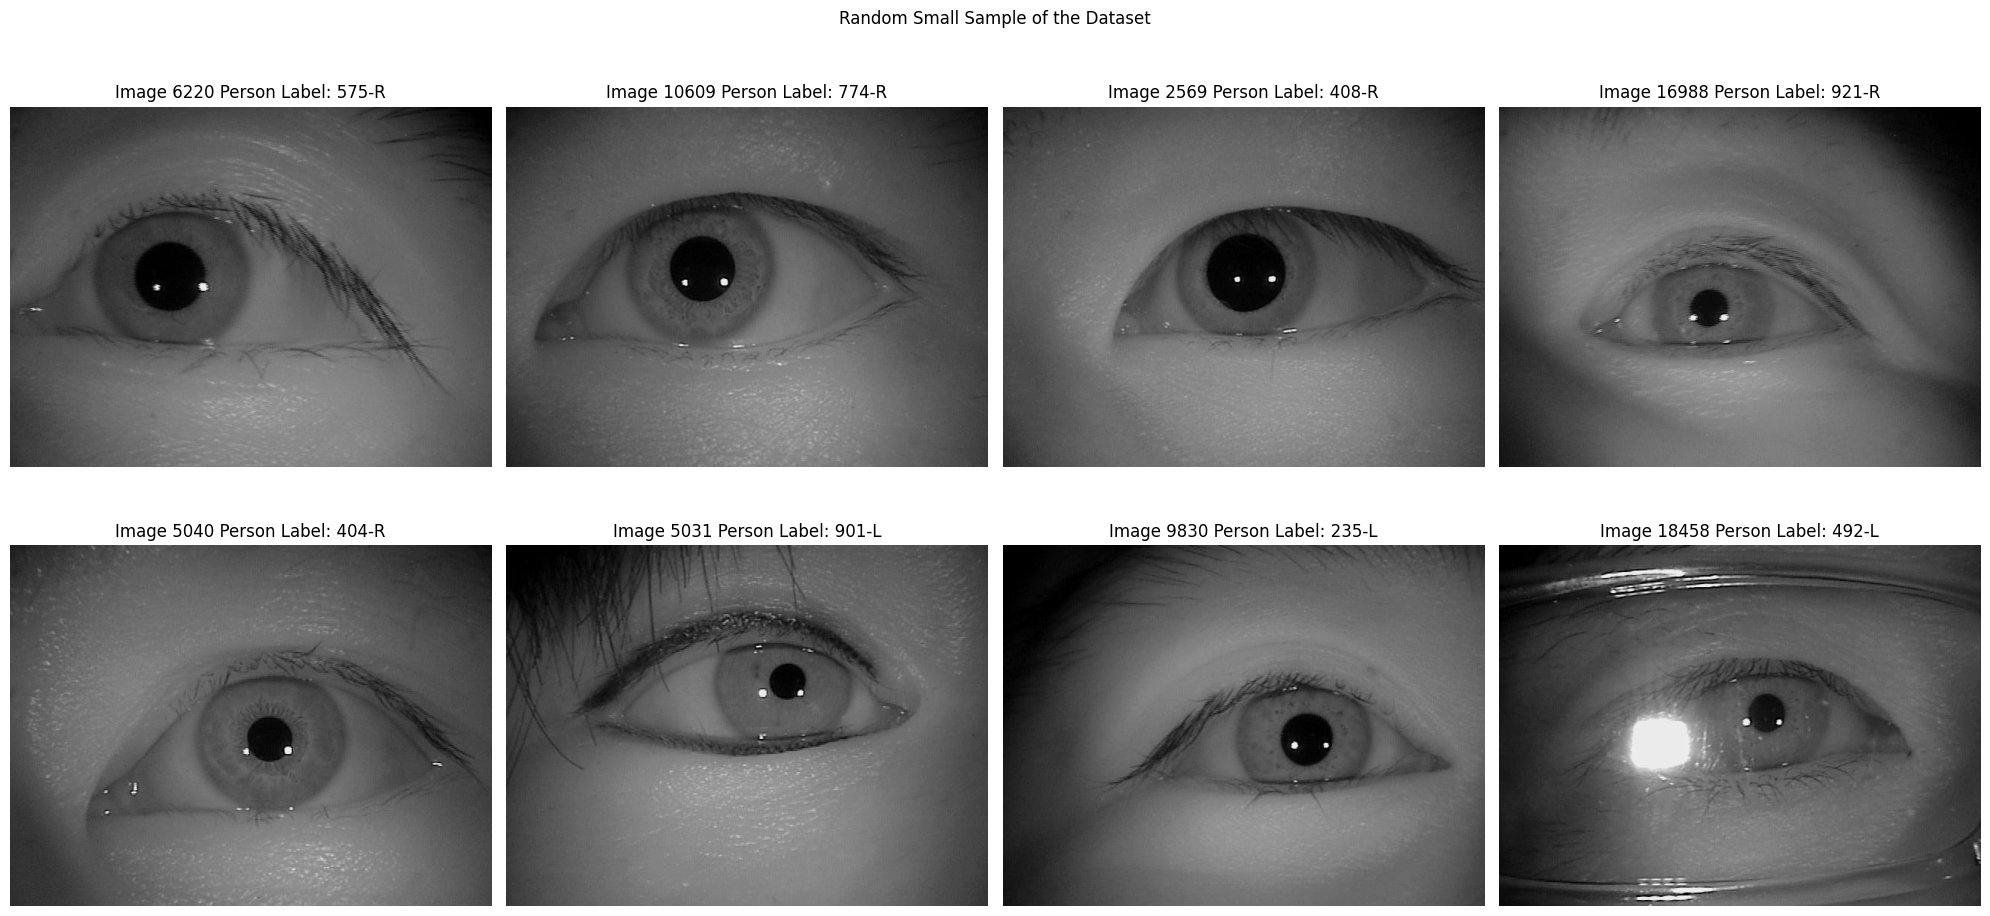

In [11]:
show_random_samples(df, 8)

The width of the images:  640
The height of the images:  480
Shape (640, 480)


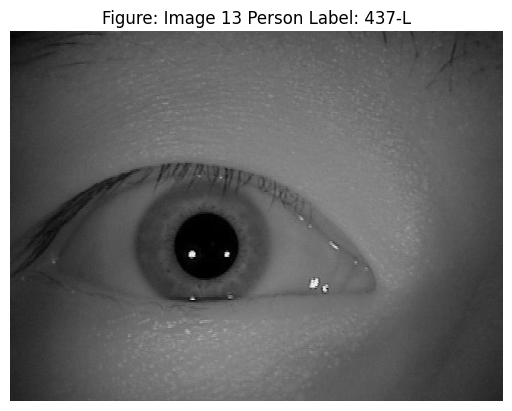

In [12]:
image_path =  df.loc[13, "ImagePath"]
image = PIL.Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Figure: Image {13} Person Label: {df.loc[13, 'Label']}")
plt.axis("off")
width, height = image.size
print("The width of the images: ", width)
print("The height of the images: ", height)
print("Shape", image.size)

In [13]:
image_sizes = []
aspect_ratios = []

for image_path in df['ImagePath']:
    image = PIL.Image.open(image_path)
    width, height = image.size
    image_sizes.append(width * height)
    aspect_ratios.append(width / height)

- Distribution of images sizes

Text(0, 0.5, 'Frequency')

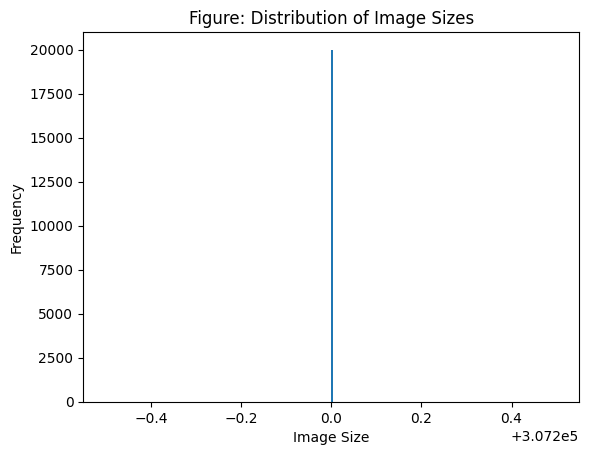

In [14]:
plt.hist(image_sizes, bins=200, label="Image Size")
plt.title("Figure: Distribution of Image Sizes")
plt.xlabel("Image Size")
plt.ylabel("Frequency")

- Distribution of aspect ratios

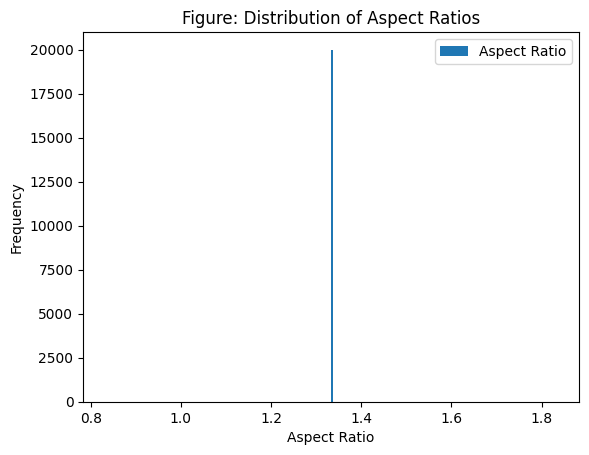

In [15]:
plt.hist(aspect_ratios, bins=200, label="Aspect Ratio")
plt.title("Figure: Distribution of Aspect Ratios")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.legend()

- Labels distribution visualizations

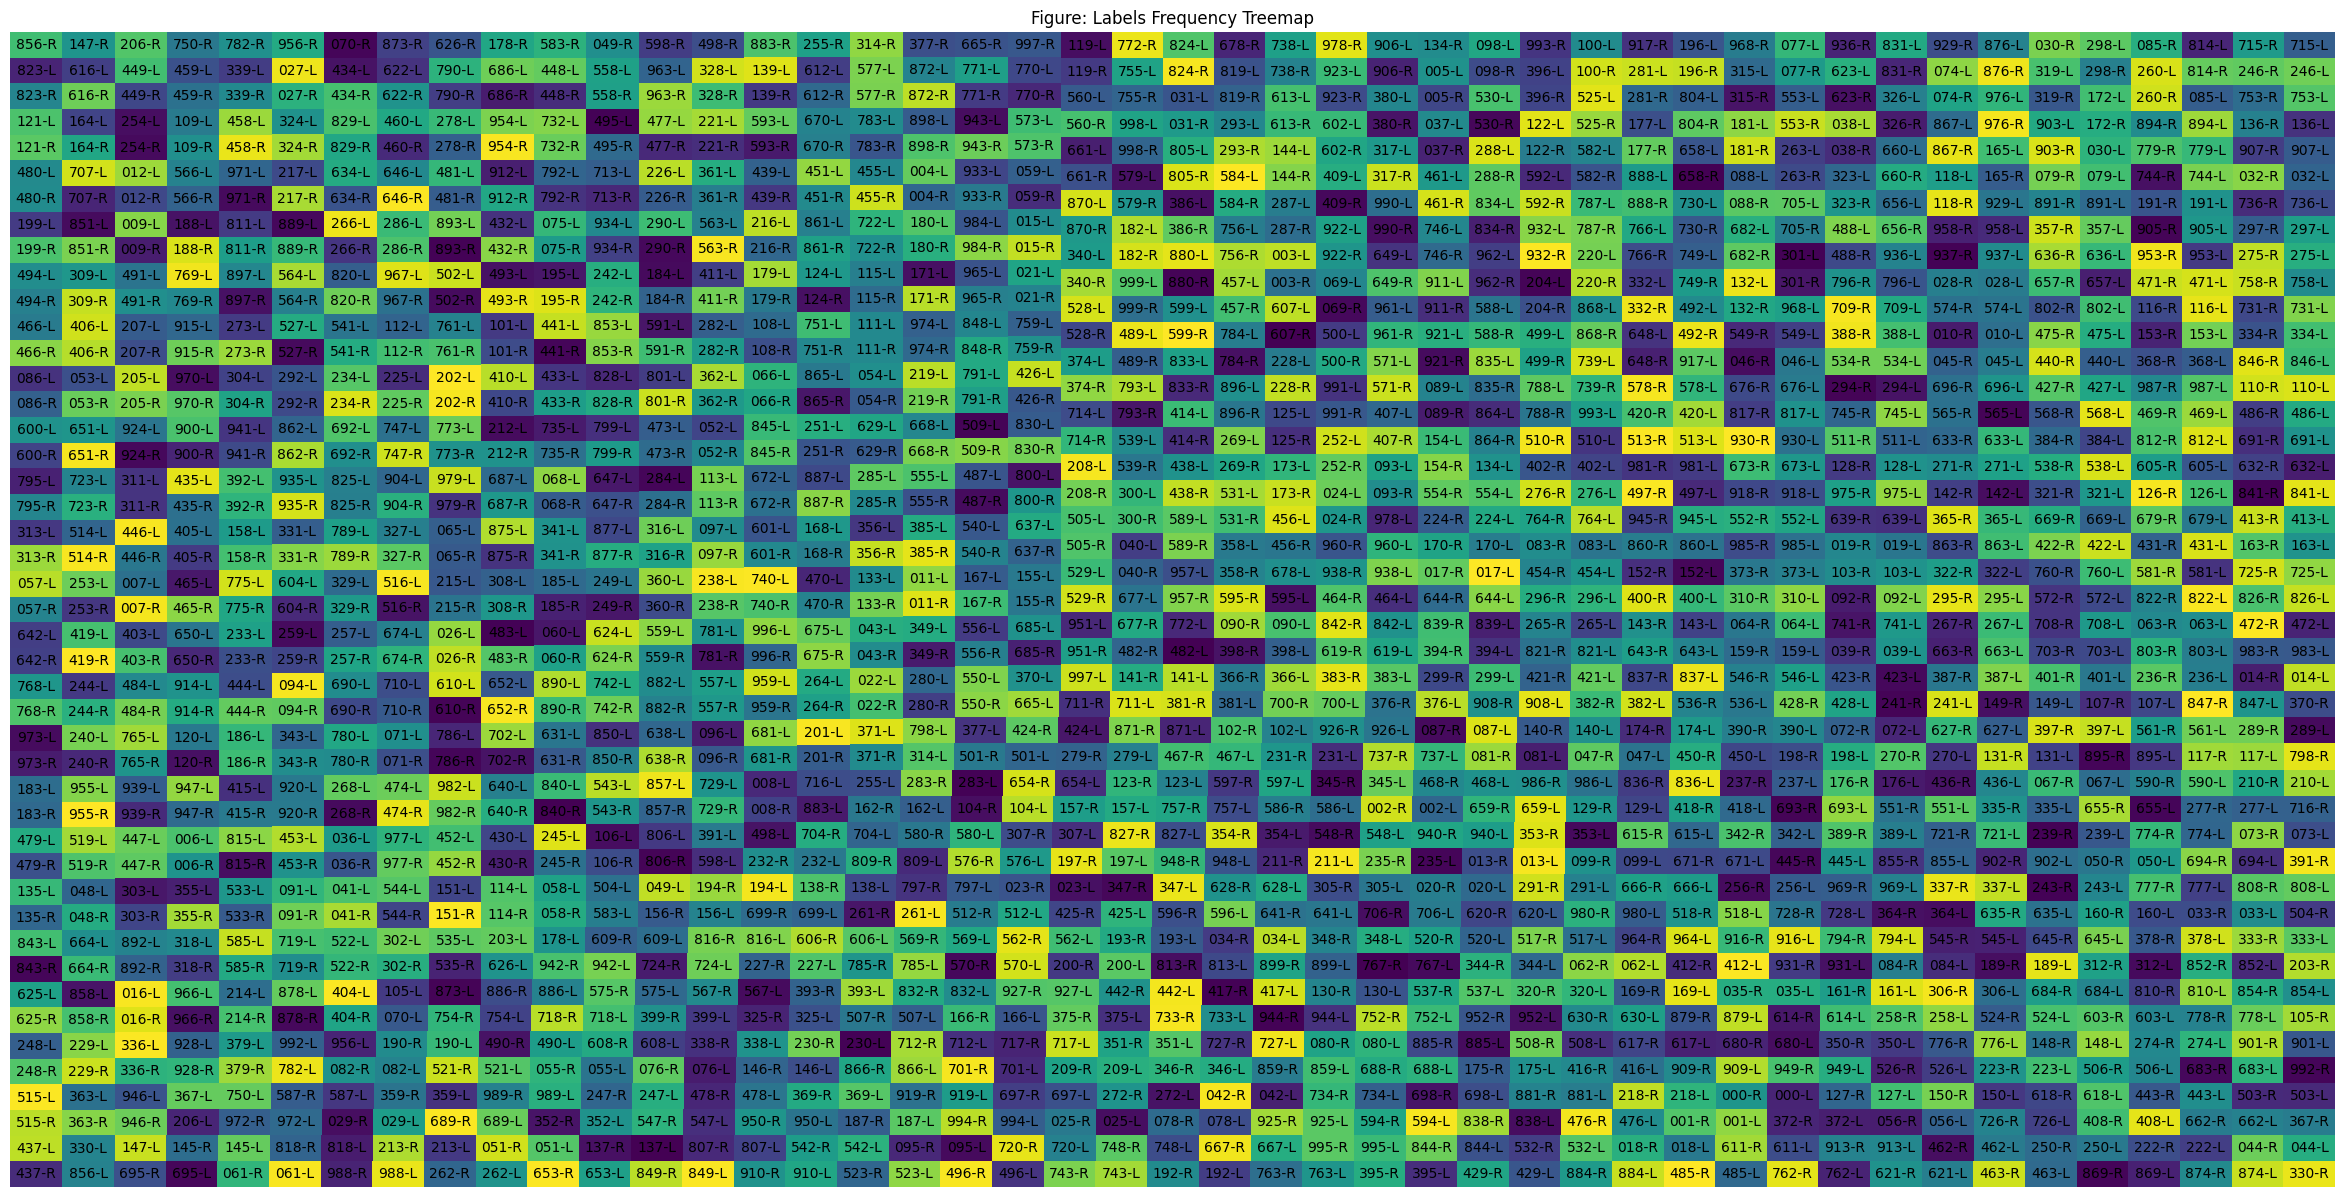

In [16]:
plt.figure(figsize=(30, 15))
squarify.plot(sizes=df['Label'].value_counts(), label=df['Label'].unique())
plt.axis('off')
plt.title('Figure: Labels Frequency Treemap')
plt.show()

#### Preparing Dataset

##### Images preparing
- In the datset exploration, no missing images, and all the images have the same sizes and the same aspect ratios. However, due to processing resources limitations the decision is to resize all the images to a consistent size but smaller than that is now. The resizing algortihm is distortion free the sizes are changed but the aspect ratio is the same using pading values.

In [17]:
def preprocess_image(img_dir, target_height=180, target_width=180, pad_value=255):
    """
    Resizing imgaes with keeping the aspect ratio.
    Args:
        img_dir(str): Image path on the dataset
        target_height(int): the targeted height to be resized
        target_width(int): the targeted width to be resized
        pad_value(int): used as the padding value for the resized image
    Returns:
        preprocessed_img (cv.Imgae): processsed image
    """
    img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    aspect_ratio = img.shape[1] / img.shape[0]
    if aspect_ratio > target_width / target_height:
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(target_height * aspect_ratio)

    resized_img = cv2.resize(img, (new_width, new_height))
    preprocessed_img = np.full((target_height, target_width), pad_value, dtype=np.uint8)
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2
    preprocessed_img[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_img
    preprocessed_img = cv2.rotate(preprocessed_img, cv2.ROTATE_90_CLOCKWISE)
    return preprocessed_img

##### labels preparing:
- For the labels preparing for training, not much is needed. There was no missing values, However the datatype of the labels will be strings instead of numerical. The label will be considered as a string (person name) and that will be encoded. The distribution of the labels was also looked into and it was found that the labesl are equally distribuation and no customized data augmentation is needed. 

In [18]:
def preprocess_labels(df):
    """
    Prepares labels for training indluding transform to string and then encode.
    Args: 
        df(pd.DataFrame):
    Rteurns:
        labels(np.array): prepared labels for training
    """
    labels = df['Label'].astype(str)
    le = LabelEncoder()
    le.fit(labels)
    labels = le.transform(labels)
    return labels

- Split the dataset into trainig, testing and validation dataset.

In [19]:
def split_dataset(preprocessed_images, preprocessed_labels, train_size=0.7, validation_size=0.15, shuffle=True):
    """
    Returns the splitted dataset using the 70:15:15 split rule
    Args:
        preprocessed_images()
        preprocessed_labels
    Returns:
        x_train(np.Array): training images
        x_valid(np.Array): validation images
        x_test(np.Array): testing images
        y_train(np.Array): training labels
        y_valid(np.Array): validation labels
        y_test(np.Array): testing labeles
    """
    np.random.seed(1190652)
    size = 11398
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    
    train_samples = int(size * train_size)
    validation_samples = int(size * validation_size)
    
    train_indices = indices[:train_samples]
    validation_indices = indices[train_samples:train_samples + validation_samples]
    test_indices = indices[train_samples + validation_samples:]
    
    x_train  = preprocessed_images[train_indices]
    y_train = preprocessed_labels[train_indices]
    x_valid = preprocessed_images[validation_indices]
    y_valid = preprocessed_labels[validation_indices]
    x_test = preprocessed_images[test_indices]
    y_test = preprocessed_labels[test_indices]
    return x_train, x_valid, x_test, y_train, y_valid, y_test

- Dataset preparation for the training

In [20]:
def prepare_dataset(df):
    """
    Prepares the dataset to training and modeling
    Args:
        df(pd.DataFrame): the dataset
    Returns:
        x_train(np.Array): training images
        x_valid(np.Array): validation images
        x_test(np.Array): testing images
        y_train(np.Array): training labels
        y_valid(np.Array): validation labels
        y_test(np.Array): testing labeles
    """
    preprocessed_images = []
    for i in range(11398):
        image = preprocess_image(images[i])
        image = image/255.
        preprocessed_images.append(image)
    
    preprocessed_images = np.array(preprocessed_images).reshape(-1, 180, 180, 1)
    preprocessed_labels = preprocess_labels(df)
    return split_dataset(preprocessed_images, preprocessed_labels)

In [21]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 2000

In [22]:
x_train, x_valid, x_test, y_train, y_valid, y_test = prepare_dataset(df)

- Sample of data preparing and preproceessing

Encoded Person Label is: 1361


<function matplotlib.pyplot.show(close=None, block=None)>

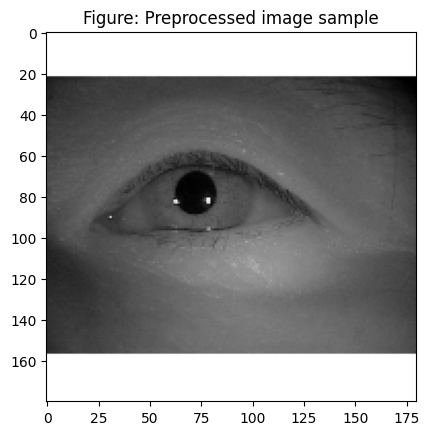

In [23]:
print(f'Encoded Person Label is: {y_train[13]}')
plt.imshow(cv2.rotate(x_train[13],  cv2.ROTATE_90_COUNTERCLOCKWISE), cmap="gray")
plt.title("Figure: Preprocessed image sample")
plt.show

<hr>

### Data modeling (The Verifier)

In [24]:
data_augmentation = keras.Sequential([keras.layers.RandomFlip("horizontal",input_shape=(180,180))])
augmented_images = data_augmentation(x_train)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Encoded Person Label is: 707


<function matplotlib.pyplot.show(close=None, block=None)>

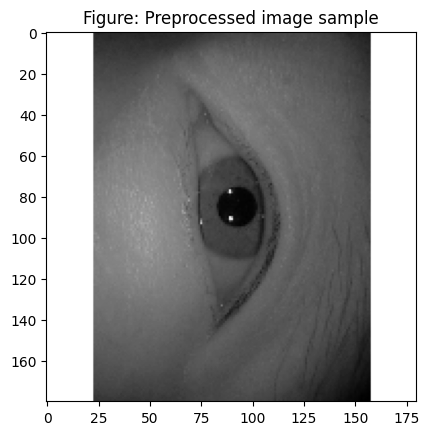

In [25]:
print(f'Encoded Person Label is: {y_train[20]}')
plt.imshow(augmented_images[20], cmap="gray")
plt.title("Figure: Preprocessed image sample")
plt.show

#### Model Archeticticure:

##### Base model (Feature Extracture)

In [26]:
def create_model(input_shape=(180, 180, 1),learning_rate=1e-2, activation='leaky_relu'):
    """
    Takes two args: 
        (optimizer): to test on diffrent optimizers
        (activation): to test on diffrent activations
    Returns:
        (model) a model compiled with it's layers
    """
    
    padding = 'same'
    poolpadding = 'valid'
    
    model = Sequential([
        Conv2D(32, (5, 5), padding=padding, input_shape=input_shape),
        Activation(activation),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding),
        Dropout(0.1),
        
        Conv2D(64, (5, 5), padding=padding),
        Activation(activation),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding),
        Dropout(0.1),
        
        Conv2D(128, (5, 5), padding=padding),
        Activation(activation),
        MaxPooling2D(pool_size=(1, 2), padding=poolpadding),
        Dropout(0.2),
        
        Conv2D(128, (3, 3), padding=padding),
        Activation(activation),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), padding=poolpadding),
        Dropout(0.25),
        
        Flatten(),
        Dense(128, activation=activation),
        
        Dense(2000, activation='softmax')  
    ])
    
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

#### Recognition model

#### Model Training and testing:

Cross Validation

In [27]:
# from sklearn.model_selection import KFold
# import numpy as np

# k = 5
# kf = KFold(n_splits=k)

# cv_scores = []
# histories = []
# for train_idx, val_idx in kf.split(x_train):
#     X_train_fold, X_val_fold = x_train[train_idx], x_train[val_idx]
#     y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
#     history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
#     _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
#     cv_scores.append(accuracy)
#     histories.append(history)

# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Score:", np.mean(cv_scores))
# print("")

In [28]:
model = create_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 180, 180, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 45, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 45, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 22, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 45, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 45, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │       258,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,628,176 (17.66 MB)

 Trainable params: 4,627,920 (17.65 MB)

 Non-trainable params: 256 (1.00 KB)

In [29]:
x_valid.shape

(1709, 180, 180, 1)

In [30]:
x_train.shape

(7978, 180, 180, 1)

In [31]:
history = model.fit(np.array(x_train), y_train, validation_data=(np.array(x_valid), y_valid), epochs=100, batch_size=128)

Epoch 1/100


I0000 00:00:1714773323.883293      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714773323.903554      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 6.9001e-04 - loss: 7.6433

W0000 00:00:1714773352.198397      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714773353.891951      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 577ms/step - accuracy: 6.8902e-04 - loss: 7.6399 - val_accuracy: 0.0000e+00 - val_loss: 9.0902
Epoch 2/100


W0000 00:00:1714773359.923572      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - accuracy: 0.0134 - loss: 6.6973 - val_accuracy: 0.0000e+00 - val_loss: 10.4204
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.1003 - loss: 4.9610 - val_accuracy: 0.0000e+00 - val_loss: 11.1940
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.2870 - loss: 3.4780 - val_accuracy: 0.0035 - val_loss: 12.1898
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.5020 - loss: 2.2016 - val_accuracy: 0.0667 - val_loss: 7.7163
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.6694 - loss: 1.3512 - val_accuracy: 0.1334 - val_loss: 7.0569
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.8054 - loss: 0.7598 - val_accuracy: 0.0919 - val_loss: 10.5645
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.8702 - loss: 0.4600 - val_accuracy: 0.0720 - val_loss: 14.9021
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.9097 - loss: 0.3197 -

#### Model Evaluaion metrics:

- Confusion Matrix:

In [32]:
# cm = confusion_matrix(y_train, y_pred)

# print("Confusion Matrix:")
# print(cm)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=["Predicted Negative", "Predicted Positive"],
#             yticklabels=["Actual Negative", "Actual Positive"])
# plt.title("Confusion Matrix Heatmap")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

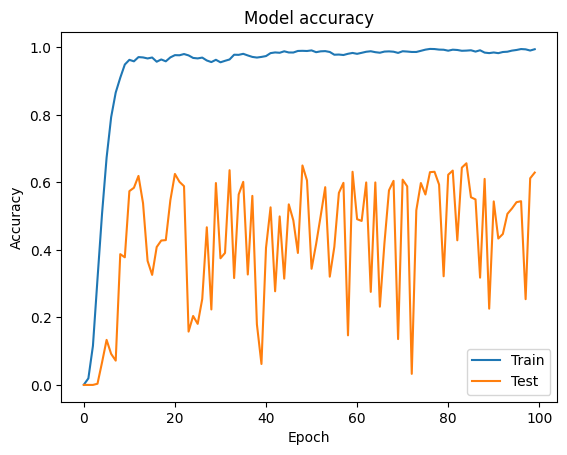

In [33]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

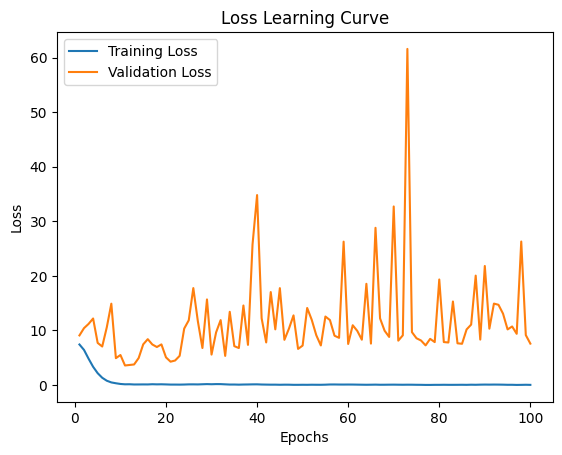

In [34]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Loss Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
test_loss, test_accuracy = model.evaluate(np.array(x_test), y_test)
print(test_accuracy)

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.6190 - loss: 7.6719
0.6288719773292542


- ROC Curve

In [36]:
# y_pred_prob = model.predict(np.array(x_test))
# y_pred_prob = y_pred_prob[:, 1]  # Extract probabilities for the positive class (class 1)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - Specificity)')
# plt.ylabel('True Positive Rate (Sensitivity)')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

<hr>

### User Experinece and GUI (The Authenticater)

#### Image Accuisition (for enrollment)

In [37]:
def enroll_clicked(b):
    """
    
    """
    iris_image = capture_iris_image()
    enroll_iris(iris_image)
    with enroll_output:
        print("Enrollment successful")

In [38]:
enroll_button = widgets.Button(description="Enroll")
enroll_output = widgets.Output()
enroll_button.on_click(enroll_clicked)

#### Image Accuisition (for authentication -> Login)

In [39]:
def login_clicked(b):
    """
    
    """
    iris_image = capture_iris_image()
    authenticated = authenticate_iris(iris_image)
    with login_output:
        print("Authentication successful" if authenticated else "Authentication failed")

In [40]:
login_button = widgets.Button(description="Login")
login_output = widgets.Output()
login_button.on_click(login_clicked)

#### Image Preparing for Recognition

In [41]:
def input_image_preprocesisng(image):
    """
    
    """

#### Model Inference

In [42]:
tab_contents = ['Login', 'Enrollment']
children = [widgets.VBox([login_button, login_output]), 
            widgets.VBox([enroll_button, enroll_output])]

tab = widgets.Tab()
tab.children = children

for i in range(len(children)):
    tab.set_title(i, tab_contents[i])

display(tab)

<hr>

## Conclusion

## Refrences
- [1] [Deep Learning for Iris Recognition: A Review, Yin, Y., He, S., Zhang, R., Chang, H., Han, X., & Zhang, J. (2024)](https://arxiv.org/abs/2303.08514)
- [2] https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
- [3] https://hycasia.github.io/dataset/casia-irisv4/
- [4] https://statisticallyrelevant.com/confusion-matrix-and-roc-curves/